In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [7]:
x_train = salary['Experience Years'].values  # Use the exact column name
y_train = salary['Salary'].values

In [8]:
def compute_sum(x,y,w,b):
    m = x.shape[0]
    cost = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
        total_cost = 1/(2*m)*cost
    return total_cost

In [9]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dJ_dw = 0
    dJ_db = 0
    for i in range(m):
        f_wb = w*x[i]+b
        dJ_dw_i = (f_wb - y[i])*x[i]
        dJ_db_i = f_wb - y[i]
        dJ_dw += dJ_db_i
        dJ_db += dJ_db_i
    dJ_dw = dJ_dw/m
    dJ_db = dJ_db/m
    return dJ_dw, dJ_db

In [10]:
def gradient_descent(x,y,w_in,b_in,learning_rate,iterations):
    w = w_in
    b = b_in
    
    for i in range(iterations):
        dJ_dw,dJ_db = compute_gradient(x,y,w,b)
        w = w - learning_rate*dJ_dw
        b = b - learning_rate*dJ_db
    if i % 100 == 0 or i == iterations - 1:
        cost = compute_sum(x, y, w, b)
        print(f"Iteration {i+1}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")
    return w,b

In [11]:
w_in = 0
b_in = 0
learning_rate= 0.001
iterations = 8000

w_final, b_final = gradient_descent(x_train,y_train,w_in,b_in,learning_rate,iterations)
print(w_final)
print(b_final)

Iteration 8000: Cost = 38312046.3545, w = 12148.4965, b = 12148.4965
12148.496546119317
12148.496546119317


In [12]:
def impliment(w,b,x):
    return w*x+b

In [13]:
y_train_predict = impliment(w_final,b_final,x_train)

In [14]:
#create a reference x=y line
y_min = min(min(y_train),min(y_train_predict))
y_max= max(max(y_train),max(y_train_predict))
y = np.linspace(y_min,y_max, 500)  # Create 500 points between min and max value
x = y  # x is equal to y

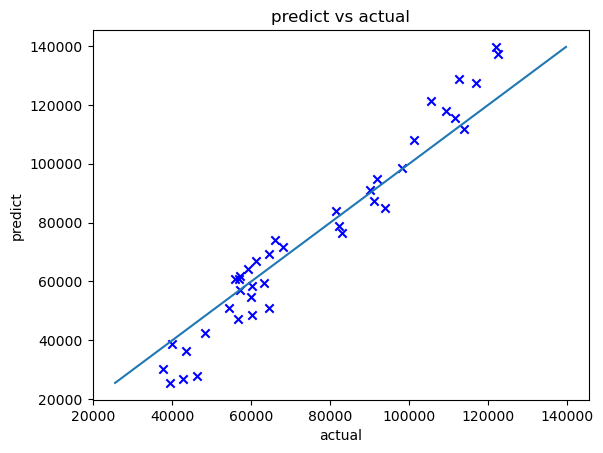

In [15]:
#checks accuracy of model
plt.scatter(y_train,y_train_predict, marker = 'x', c='b')
plt.plot(x,y)
plt.title("predict vs actual")
plt.xlabel("actual")
plt.ylabel("predict")
plt.show()

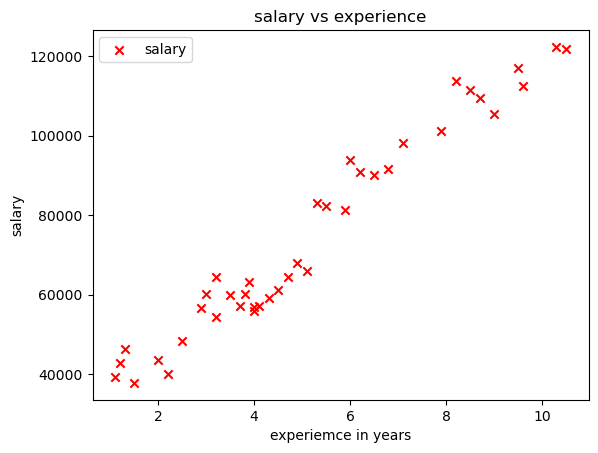

In [16]:
plt.scatter(x_train,y_train,marker= 'x', c='r',label = "salary")
plt.title("salary vs experience")
plt.xlabel("experiemce in years")
plt.ylabel("salary")
plt.legend()

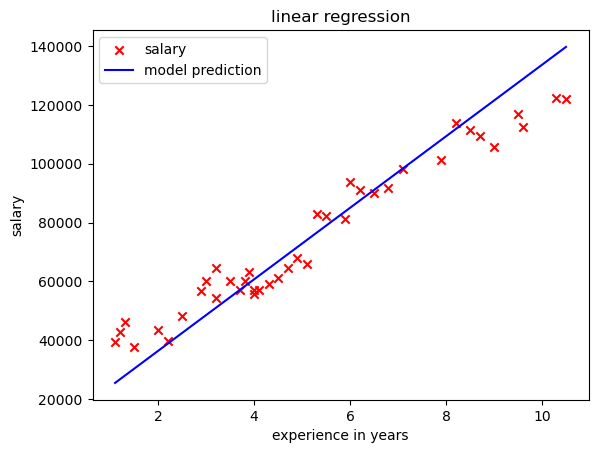

In [17]:
plt.scatter(x_train,y_train,marker= 'x', c='r',label = "salary")
x_line = np.linspace(min(x_train), max(x_train), 100)
y_line = w_final*x_line + b_final
plt.plot(x_line,y_line, color = 'b', label='model prediction')
plt.xlabel("experience in years")
plt.ylabel("salary")
plt.title("linear regression")
plt.legend()

In [18]:
# Z Score Normalisation
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_train_normalised = (x_train - x_mean)/x_std

In [19]:
# implementation of z score normalisation using new x train
w_in_z = 0
b_in_z = 0
learning_rate = 0.01
iterations = 9000

w_final_z, b_final_z = gradient_descent(x_train_normalised,y_train,w_in_z,b_in_z,learning_rate,iterations)
print(w_final_z)
print(b_final_z) 

Iteration 9000: Cost = 1249249070.1831, w = 74743.6250, b = 74743.6250
74743.62499999927
74743.62499999927


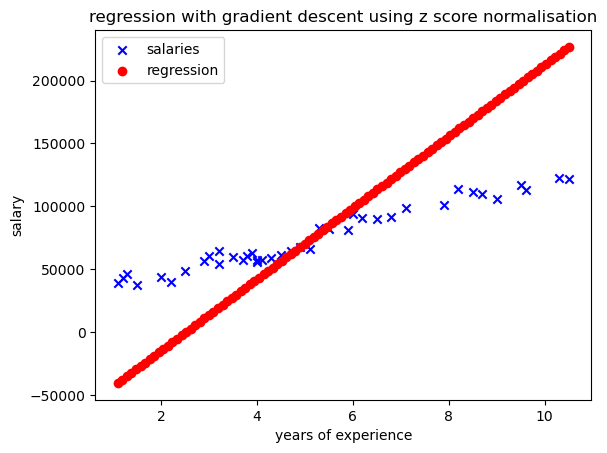

In [20]:
#plotting of z score
plt.scatter(x_train,y_train,marker='x',c='b',label = "salaries")
x_line_z = np.linspace(min(x_train_normalised), max(x_train_normalised), 100)
y_line_z = w_final_z*x_line_z + b_final_z
x_line_original = x_line_z*x_std + x_mean
#we have gotten the original line now plot this 
plt.scatter(x_line_original,y_line_z, c='r',label = "regression")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.title("regression with gradient descent using z score normalisation")
plt.legend()

In [21]:
#to calculate the cost history and stre to plot it with iterations
def calculate_cost_history(x, y, w_in, b_in, learning_rate, iterations):
    w = w_in
    b = b_in
    cost_history = []
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= learning_rate * dj_dw
        b -= learning_rate * dj_db

        # Store the cost
        cost = compute_sum(x, y, w, b)
        cost_history.append(cost)
    
    return cost_history

In [23]:
w_in = 0
b_in = 0
learning_rate = 0.001
iterations = 5000

w_final_c , b_final_c = gradient_descent(x_train,y_train, w_in,b_in, learning_rate,iterations)
cost_history = calculate_cost_history(x_train, y_train, w_in, b_in, learning_rate, iterations)

Iteration 5000: Cost = 38312046.3545, w = 12148.4965, b = 12148.4965


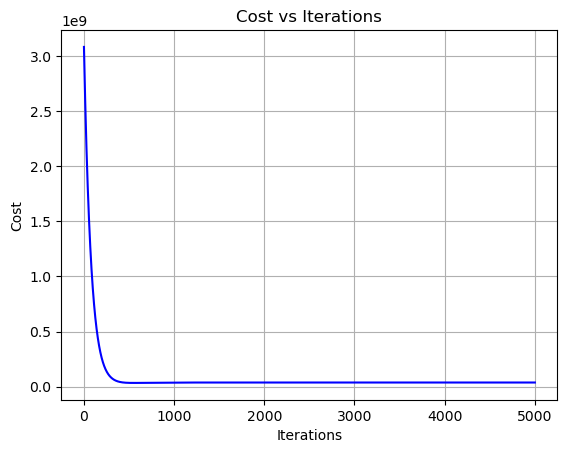

In [24]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.title('Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid()